In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
import math
import numpy as np
import pandas as pd
from mlxtend.preprocessing import minmax_scaling
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import recall_score, precision_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# Inspecting Prosper Loan Data.csv file
Next to importing libraries, it’s our data to import, either from local disk or from url link

In [ ]:
df = pd.read_csv("/content/prosperLoanData.csv")
pd.set_option("display.max_columns", len(df.columns))

# Inspecting Prosper Data DataFrame
Before getting into modeling, we need to understand the statistical importance for better understanding,

In [ ]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [ ]:
df.shape

(113937, 81)

In [ ]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

# Checking target incidence

In [ ]:
df = df[df["LoanStatus"] != "Current"]
df["LoanStatus"].value_counts()

Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [ ]:
df["LoanStatus"] = (df["LoanStatus"] == "Completed").astype(int)
df["LoanStatus"][:10]

0     1
2     1
11    1
12    0
15    0
17    0
21    1
23    0
26    1
27    1
Name: LoanStatus, dtype: int64

# Data Cleaning

In [ ]:
df.drop(["ListingKey", "ListingNumber", "LoanKey", "LoanNumber",'LoanFirstDefaultedCycleNumber',"MemberKey","GroupKey"], axis=1, inplace=True)

# Preprocessing: imputation of missing values 

In [ ]:
categorical = df.select_dtypes(include=['bool','object']).columns
numerical=df.select_dtypes('number').columns
df_c = df[categorical].copy()
df_n = df[numerical].copy()

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
imp.fit(df_n)
df_num_imputed = imp.transform(df_n)

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp.fit(df_c)
df_cat_imputed = imp.transform(df_c)

In [ ]:
df_c= pd.DataFrame(df_cat_imputed, columns=df_c.columns.tolist())
df_n= pd.DataFrame(df_num_imputed, columns=df_n.columns.tolist())
data=pd.concat([df_n,df_c],axis=1)

In [ ]:
data.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationDate,CreditGrade,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,IncomeVerifiable,LoanOriginationDate,LoanOriginationQuarter
0,36.0,1.0,0.16516,0.1580,0.1380,0.178799,0.09416,0.107756,3.639707,6.174382,0.0,2.000000,640.0,659.0,5.000000,4.000000,12.0,1.0,24.0,3.0,3.0,2.0,472.000000,4.0,0.0,0.000000,0.000000,0.000000,1500.000000,11.000000,0.810000,0.000000,0.17,3083.333333,1.337528,20.233199,19.585899,0.594913,0.051941,7178.250179,2411.318249,-0.015004,0.0,78.0,9425.0,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,258.0,2007-08-26 19:09:29.263000000,C,2009-08-14 00:00:00,D,CO,Other,Self-employed,True,True,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",True,2007-09-12 00:00:00,Q3 2007
1,36.0,1.0,0.28269,0.2750,0.2400,0.178799,0.09416,0.107756,3.639707,6.174382,0.0,81.616592,480.0,499.0,9.583435,8.363346,3.0,0.0,0.0,0.0,1.0,1.0,1065.968395,0.0,0.0,0.023353,15691.794059,0.532197,10761.775498,21.834996,0.857548,0.906618,0.06,2083.333333,1.337528,20.233199,19.585899,0.594913,0.051941,7178.250179,2411.318249,-0.015004,0.0,86.0,3001.0,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,41.0,2007-01-05 15:00:47.090000000,HR,2009-12-17 00:00:00,D,GA,Other,Not available,False,True,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,True,2007-01-17 00:00:00,Q1 2007
2,36.0,1.0,0.15033,0.1325,0.1225,0.178799,0.09416,0.107756,3.639707,6.174382,0.0,19.000000,640.0,659.0,2.000000,2.000000,10.0,1.0,40.0,3.0,5.0,3.0,2224.000000,1.0,0.0,0.000000,1220.000000,0.320000,2580.000000,7.000000,0.400000,0.000000,0.27,1666.666667,1.337528,20.233199,19.585899,0.594913,0.051941,7178.250179,2411.318249,-0.015004,0.0,77.0,1000.0,33.81,1011.6500,1000.00,11.6500,-0.88,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,53.0,2007-10-09 20:28:33.640000000,C,2008-01-07 00:00:00,D,CA,Waiter/Waitress,Full-time,False,False,2007-10-08 13:13:44.363000000,2000-11-13 00:00:00,"$1-24,999",True,2007-10-18 00:00:00,Q4 2007
3,36.0,0.0,0.17969,0.1435,0.1335,0.126400,0.05240,0.074000,5.000000,4.000000,1.0,1.000000,680.0,699.0,9.000000,7.000000,29.0,8.0,290.0,1.0,4.0,0.0,0.000000,0.0,0.0,0.000000,8624.000000,0.700000,3626.000000,20.000000,1.000000,0.000000,0.18,2416.666667,1.337528,20.233199,19.585899,0.594913,0.051941,7178.250179,2411.318249,-0.015004,3.0,2.0,4000.0,137.39,135.8174,88.64,47.1774,-3.40,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,1.0,2013-12-15 20:01:10.757000000,C,2014-03-04 00:00:00,B,AL,Sales - Retail,Employed,False,False,2013-12-15 20:01:13,1996-11-09 00:00:00,"$25,000-49,999",True,2014-01-07 00:00:00,Q1 2014
4,36.0,0.0,0.35797,0.3177,0.3077,

In [ ]:
print(str('Any missing data or NaN in the dataset:'),data.isnull().values.any())

Any missing data or NaN in the dataset: False


# Encoding
In datasets we may contain object datatypes. for building a model we need to have all features are in integer datatypes. so, Label Encoder are used to convert object datatype to integer datatype.

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_list = [] 
num_list = []
for colname, colvalue in df_c.iteritems():
        cat_list.append(colname)
for col in cat_list:
    encoder = LabelEncoder()
    encoder.fit(df_c[col])
    df_c[col] = encoder.transform(df_c[col])

L=df_c.columns.to_list()
df_c = pd.DataFrame(df_c, columns=L)
data=pd.concat([df_c,data],axis=1)

data = data.select_dtypes(exclude=['object'])
data.head()

,ListingCreationDate,CreditGrade,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,IncomeVerifiable,LoanOriginationDate,LoanOriginationQuarter,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,14183,3,1136,4,5,35,7,1,1,14346,7116,3,1,425,17,36.0,1.0,0.16516,0.1580,0.1380,0.178799,0.09416,0.107756,3.639707,6.174382,0.0,2.000000,640.0,659.0,5.000000,4.000000,12.0,1.0,24.0,3.0,3.0,2.0,472.000000,4.0,0.0,0.000000,0.000000,0.000000,1500.000000,11.000000,0.810000,0.000000,0.17,3083.333333,1.337528,20.233199,19.585899,0.594913,0.051941,7178.250179,2411.318249,-0.015004,0.0,78.0,9425.0,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,258.0
1,6428,6,1261,4,10,35,2,0,1,6445,7397,6,1,259,1,36.0,1.0,0.28269,0.2750,0.2400,0.178799,0.09416,0.107756,3.639707,6.174382,0.0,81.616592,480.0,499.0,9.583435,8.363346,3.0,0.0,0.0,0.0,1.0,1.0,1065.968395,0.0,0.0,0.023353,15691.794059,0.532197,10761.775498,21.834996,0.857548,0.906618,0.06,2083.333333,1.337528,20.233199,19.585899,0.594913,0.051941,7178.250179,2411.318249,-0.015004,0.0,86.0,3001.0,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,41.0
2,15373,3,536,4,4,66,1,0,0,15487,6794,1,1,450,26,36.0,1.0,0.15033,0.1325,0.1225,0.178799,0.09416,0.107756,3.639707,6.174382,0.0,19.000000,640.0,659.0,2.000000,2.000000,10.0,1.0,40.0,3.0,5.0,3.0,2224.000000,1.0,0.0,0.000000,1220.000000,0.320000,2580.000000,7.000000,0.400000,0.000000,0.27,1666.666667,1.337528,20.233199,19.585899,0.594913,0.051941,7178.250179,2411.318249,-0.015004,0.0,77.0,1000.0,33.81,1011.6500,1000.00,11.6500,-0.88,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,53.0
3,57209,3,2795,2,1,48,0,0,0,57210,5367,3,1,1827,7,36.0,0.0,0.17969,0.1435,0.1335,0.126400,0.05240,0.074000,5.000000,4.000000,1.0,1.000000,680.0,699.0,9.000000,7.000000,29.0,8.0,290.0,1.0,4.0,0.0,0.000000,0.0,0.0,0.000000,8624.000000,0.700000,3626.000000,20.000000,1.000000,0.000000,0.18,2416.666667,1.337528,20.233199,19.585899,0.594913,0.051941,7178.250179,2411.318249,-0.015004,3.0,2.0,4000.0,137.39,135.8174,88.64,47.1774,-3.40,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,1.0
4,47472,3,2355,6,9,35,4,1,0,47434,6192,4,1,1398,14,36.0,0.0,0.35797,0.3177,0.3077,0.289600,0.16500,0.124600,1.000000,5.000000,13.0,121.000000,700.0,719.0,10.000000,9.000000,18.0,5.0,300.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.000000,9103.000000,0.970000,178.000000,17.000000,0.940000,0.000000,0.49,5500.000000,1.337528,20.233199,19.585899,0.594913,0.051941,7178.250179,2411.318249,-0.015004,140.0,23.0,4000.0,173.71,521.1300,209.75,311.3800,-9.81,0.0,3790.25,3790.25,0.0,1.0,0.0,0.0,0.0,10.0


# Feature Seection by using mutual_info_classif

In [ ]:
X = data.copy()
y = X.pop("LoanStatus")
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

LoanCurrentDaysDelinquent       0.615813
LP_CustomerPrincipalPayments    0.531353
LP_GrossPrincipalLoss           0.480239
LP_NetPrincipalLoss             0.470328
LP_CustomerPayments             0.196394
                                  ...   
InvestmentFromFriendsCount      0.000074
RevolvingCreditBalance          0.000000
CurrentlyInGroup                0.000000
TotalTrades                     0.000000
Recommendations                 0.000000
Length: 73, dtype: float64

Text(0.5, 0, 'Features')

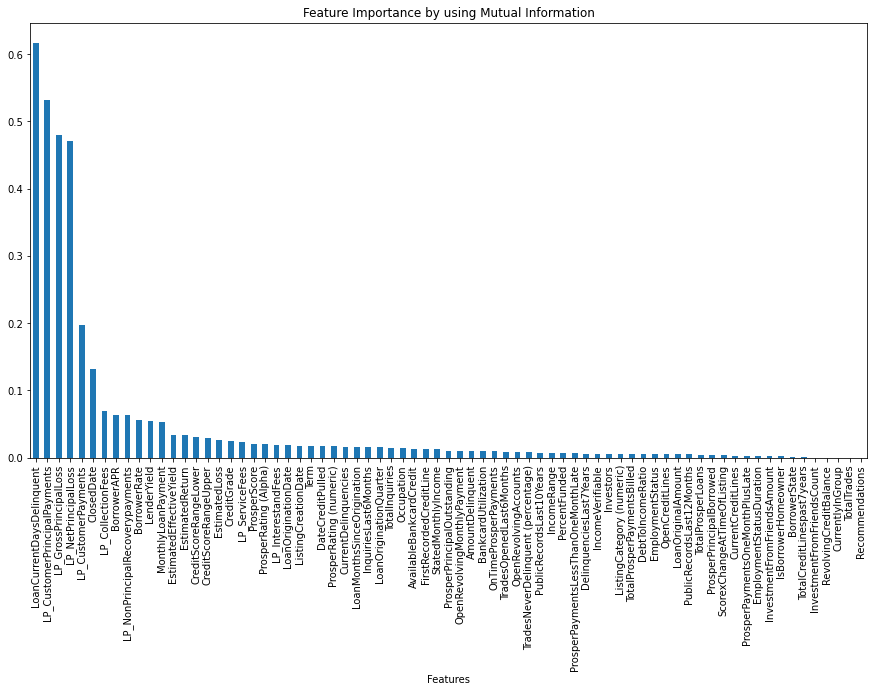

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 8))
plt.title("Feature Importance by using Mutual Information")
plt.xlabel("Features")

# 10 best Feature selection using by mutual_info_classif 

In [ ]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X, y)
selected_data=X.columns[sel_five_cols.get_support()]
selected_data

Index(['ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LoanCurrentDaysDelinquent', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_CollectionFees',
       'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments'],
      dtype='object')

In [ ]:
X=X.loc[:,['ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LoanCurrentDaysDelinquent', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_CollectionFees',
       'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments']]

# Handling imbalanced data
To reduce overfitting and underfitting problem.

Over Sampling minority class using Synthetic Minority Oversampling Technique (SMOTE)-In this method, synthetic samples are generated for the minority class and equal to the majority class.

In [ ]:
from imblearn.over_sampling import SMOTE 
smot = SMOTE(sampling_strategy='minority') 
X, y = smot.fit_resample(X, y) 
y.value_counts()

1.0    38074
0.0    38074
Name: LoanStatus, dtype: int64

# Spliting data into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=int(len(X) * 0.67),random_state=42)
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (51019, 10)
y_train: (51019,)
X_test: (25129, 10)
y_test: (25129,)


In [ ]:
X_train.head()

,ClosedDate,BorrowerAPR,BorrowerRate,LoanCurrentDaysDelinquent,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments
11771,2483,0.22287,0.2005,0.0,4018.64,3000.0,0.0,0.0,0.0,0.0
25799,2438,0.24246,0.2049,0.0,7782.86,7000.0,0.0,0.0,0.0,0.0
39331,999,0.14458,0.1375,0.0,8312.59,7000.0,0.0,0.0,0.0,0.0
6158,1349,0.08778,0.0800,0.0,2391.63,2200.0,0.0,0.0,0.0,0.0
44127,8,0.09688,0.0900,0.0,2551.89,2550.0,0.0,0.0,0.0,0.0


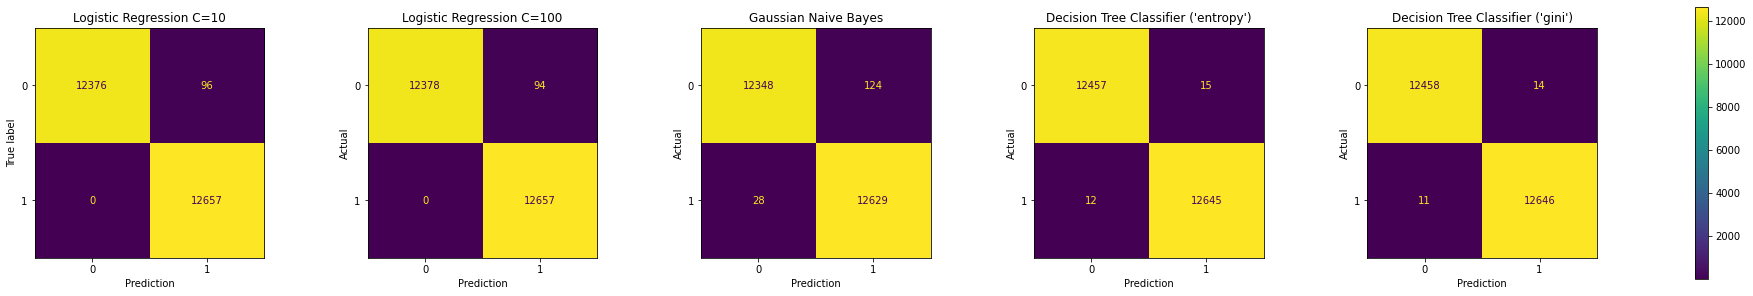

,CV_Score,X_train_Pred_Acc,X_test_Pred_Acc,Roc_Auc_Score,RMSValue
Logistic Regression C=10,0.996354,0.996295,0.996180,0.996151,0.061808
Logistic Regression C=100,0.996433,0.996452,0.996259,0.996232,0.061161
Gaussian Naive Bayes,0.994081,0.994100,0.993951,0.993923,0.077774
Decision Tree Classifier ('entropy'),0.999255,1.000000,0.998926,0.998925,0.032779
Decision Tree Classifier ('gini'),0.999275,1.000000,0.999005,0.999004,0.031542


In [ ]:
models = {"Logistic Regression C=10": LogisticRegression(C=10), 
          "Logistic Regression C=100": LogisticRegression(C=100),
          "Gaussian Naive Bayes": GaussianNB(), 
          "Decision Tree Classifier ('entropy')": DecisionTreeClassifier(criterion='entropy'),
          "Decision Tree Classifier ('gini')": DecisionTreeClassifier(criterion='gini'),
          }

res = {}
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
f, axes = plt.subplots(1, 5, figsize=(35, 5))

for i, (name, model) in enumerate(models.items()):
    
    n = name + " " 
    clf = model.fit(X_train,y_train)
    y_pred_tr = model.predict(X_train)
    y_pred_ts = model.predict(X_test)
        

    Cross_Validation_Score = cross_val_score(clf, X_train, y_train, cv=10).mean()
        
    acc_pred_tr = np.mean(accuracy_score(y_train,y_pred_tr))
    acc_pred_ts = np.mean(accuracy_score(y_test,y_pred_ts))
        
    RMSValue = np.sqrt(mean_squared_error(y_test, y_pred_ts))
       
    Roc_Auc_Score =  roc_auc_score(y_test, y_pred_ts)
        
    res[n] = {"CV_Score": Cross_Validation_Score ,
                  "X_train_Pred_Acc":acc_pred_tr,"X_test_Pred_Acc":acc_pred_ts,
                  "RMSValue":RMSValue,"Roc_Auc_Score":Roc_Auc_Score 
                   }
        


    cf_matrix = confusion_matrix(y_test, y_pred_ts)
    disp = ConfusionMatrixDisplay(cf_matrix)
   
    disp.plot(ax=axes[i])
    disp.ax_.set_title(name)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('Prediction')
  
    if i!=0:
        disp.ax_.set_ylabel('Actual')
    
plt.subplots_adjust(wspace=0.45, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

results = pd.DataFrame.from_dict(res, orient="index")
results = results[["CV_Score",'X_train_Pred_Acc','X_test_Pred_Acc','Roc_Auc_Score',"RMSValue"]]

results

### Predictiong the ROI

In [ ]:
import lightgbm
X1 = data.copy()
y1 = X1.pop("BorrowerRate")
gbm = lightgbm.LGBMRegressor()
gbm.fit(X1, y1)

LGBMRegressor()

In [ ]:
gbm.booster_.feature_importance()
fea_imp_ = pd.DataFrame({'cols':X1.columns, 'fea_imp':gbm.feature_importances_})
fea_imp_sorted = fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = True)
fea_imp_sorted

,cols,fea_imp
41,BankcardUtilization,1
7,IsBorrowerHomeowner,1
36,AmountDelinquent,1
28,CurrentCreditLines,1
56,LoanCurrentDaysDelinquent,2
66,LP_NetPrincipalLoss,2
44,TradesNeverDelinquent (percentage),3
39,PublicRecordsLast12Months,3
4,BorrowerState,3
37,DelinquenciesLast7Years,3


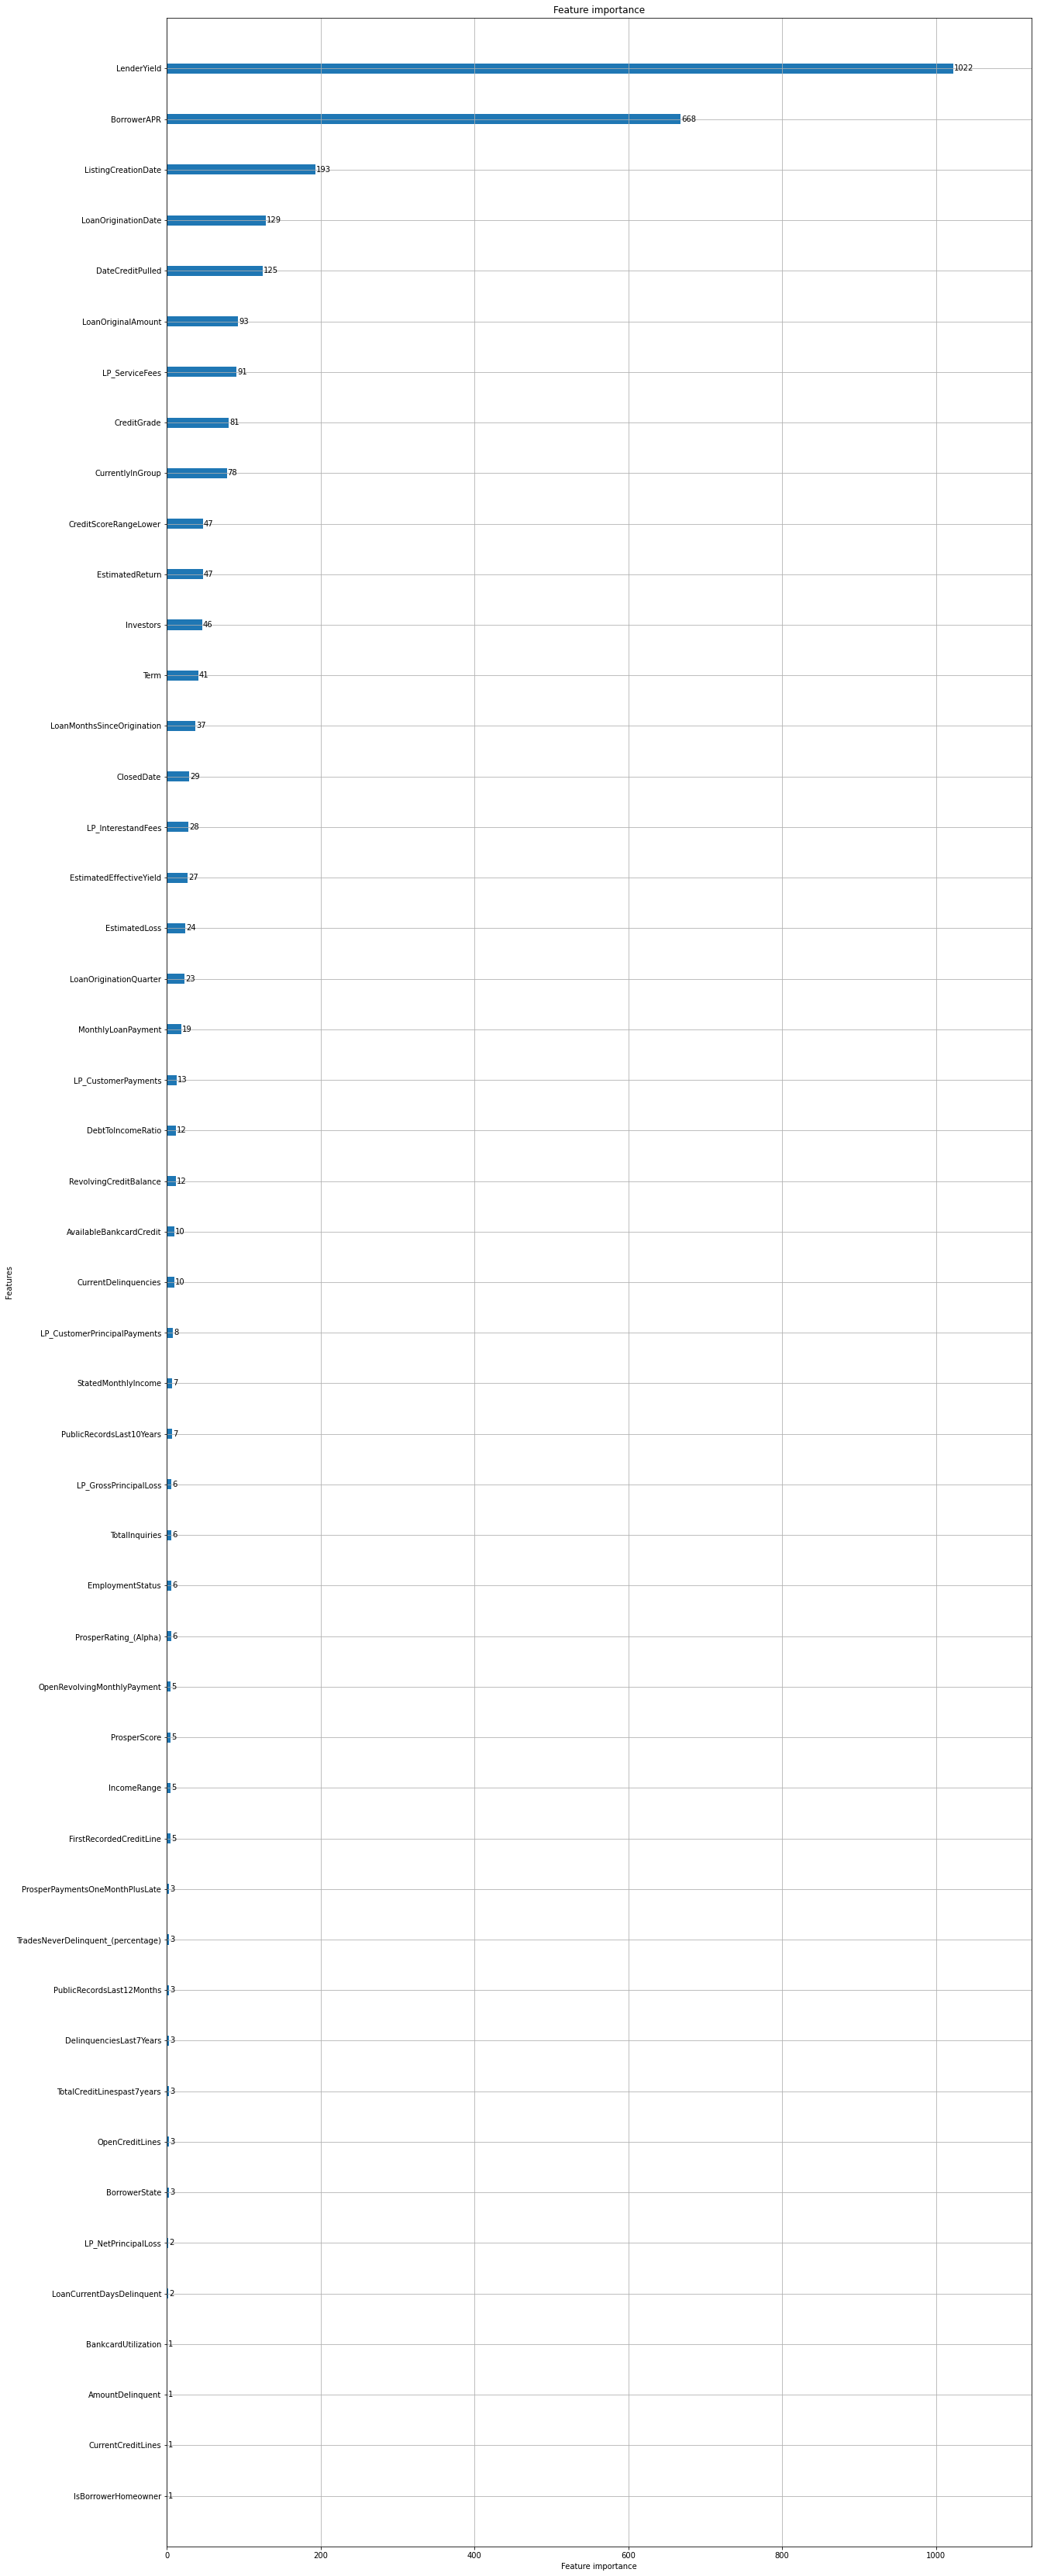

In [ ]:
lightgbm.plot_importance(gbm, figsize = (20, 60))
plt.show()

In [ ]:
L=fea_imp_sorted.cols.tolist()[-10:]
X1=X1.loc[:,L]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,train_size=int(len(X) * 0.67),random_state=42)
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (51019, 10)
y_train: (51019,)
X_test: (6342, 10)
y_test: (6342,)


In [ ]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
models = {"XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),"LinearRegression":LinearRegression()
          }

res = {}
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

for i, (name, model) in enumerate(models.items()):
    
    n = name + " " 
    
    clf = model.fit(X_train,y_train)
      
    y_pred_tr = model.predict(X_train)
    y_pred_ts = model.predict(X_test)
        
    Cross_Validation_Score = cross_val_score(clf, X_train, y_train, cv=10).mean()

    RMSValue = np.sqrt(mean_squared_error(y_test, y_pred_ts))
      
    res[n] = {"CV_Score": Cross_Validation_Score ,
                  "RMSValue":RMSValue
                   }
results = pd.DataFrame.from_dict(res, orient="index")
results = results[["CV_Score","RMSValue"]]

results

[16:17:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:17:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:18:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,CV_Score,RMSValue
XGBRegressor,0.998753,0.002854
RandomForestRegressor,0.999773,0.001332
DecisionTreeRegressor,0.999649,0.001657
LinearRegression,0.998114,0.003573
